##  グレイスケール画像の解析

ここではグレイスケール画像をパーシステントホモロジーで解析します。
ここで解説する内容は以下の通りです。白黒画像との共通点は非常に多いです。

1. 画像からパーシステント図を計算する
2. その図を可視化する
3. テキストデータにbirth-death pairを出力する
4. 基本的な逆解析(birth pixle, death pixelの出力)を行う

ここでは入力データとしてはテキストデータを使いますが、
普通の画像でも基本は同じです。


## テキストデータについて

ディレクトリには `grayscale.txt` というファイルがあります。数値が2次元に200x200で並んでいます。これを解析してみましょう。まずデータの中身を見てみます。最初の5行をheadコマンドで表示します。

In [1]:
head -n 5 grayscale.txt

-1.730758967375994217e+00 -1.713858515829446594e+00 -1.691633112022641994e+00 -1.679718096038807618e+00 -1.685308248930357689e+00 -1.700368281773350088e+00 -1.707905711887251599e+00 -1.694812143509194069e+00 -1.661199255611575332e+00 -1.622298108247220316e+00 -1.599581140725563122e+00 -1.603675232841302645e+00 -1.625173753338172933e+00 -1.644864290491452108e+00 -1.651213598690645545e+00 -1.646452865341155869e+00 -1.638912366030435885e+00 -1.632312171719611404e+00 -1.622751801460625476e+00 -1.605687299663269618e+00 -1.583353906135061440e+00 -1.562313095975464750e+00 -1.544877025235305235e+00 -1.526418704835411644e+00 -1.499500718772709629e+00 -1.458694421108197581e+00 -1.405291967626651317e+00 -1.350706410590394091e+00 -1.310630019565630189e+00 -1.289515908147926604e+00 -1.273576385894160667e+00 -1.246041278660831475e+00 -1.208238573859422793e+00 -1.179100655785092266e+00 -1.172998700814633644e+00 -1.184251021992251518e+00 -1.195641090467561618e+00 -1.196139433537825703e+00 -1.187015569

-1.741454101353613559e+00 -1.729622058466623535e+00 -1.713878091291925365e+00 -1.704934021735842187e+00 -1.707825228626931535e+00 -1.717399140294626037e+00 -1.722696551094777817e+00 -1.715375251666756196e+00 -1.695058682360699454e+00 -1.669914008818464302e+00 -1.651769834846527951e+00 -1.646896497515681901e+00 -1.650231922637710014e+00 -1.650358861833126189e+00 -1.640453395556220828e+00 -1.623954055500381299e+00 -1.609715077126896876e+00 -1.602298844239812947e+00 -1.598448843416126586e+00 -1.593206189396865868e+00 -1.585603789447744161e+00 -1.576009320408387593e+00 -1.561854955566292391e+00 -1.539461463502607597e+00 -1.506911359058535904e+00 -1.463692619165385178e+00 -1.412175375321357507e+00 -1.361608997372756091e+00 -1.325162866640571258e+00 -1.307688340947906980e+00 -1.299063080684429217e+00 -1.284735217808339325e+00 -1.261342625514830784e+00 -1.238055573053047809e+00 -1.223635679584247127e+00 -1.216783555274837170e+00 -1.210081747930285667e+00 -1.199573264265874295e+00 -1.188587563

-1.755577755912725690e+00 -1.751071994733212733e+00 -1.744675838544958779e+00 -1.739925486526474163e+00 -1.738502933108204473e+00 -1.738731179044636699e+00 -1.736929406407689447e+00 -1.729947275488383340e+00 -1.716786880643438762e+00 -1.699409395230280451e+00 -1.682351469076435624e+00 -1.669738885489829183e+00 -1.661106506801942162e+00 -1.651195751525147415e+00 -1.635516607026993530e+00 -1.616151488541854420e+00 -1.600612088901116836e+00 -1.594944199421608255e+00 -1.599342732125340172e+00 -1.609453482220173148e+00 -1.617998869257907035e+00 -1.615573394399963281e+00 -1.595626691100029859e+00 -1.560340702530947254e+00 -1.518017825253900055e+00 -1.474909207240480580e+00 -1.433039117064777379e+00 -1.394902823882349763e+00 -1.365206051985952795e+00 -1.345961022695023823e+00 -1.332671473208160817e+00 -1.318128340428704526e+00 -1.298874918482850749e+00 -1.276519657807724917e+00 -1.253796083304502318e+00 -1.231274155387022562e+00 -1.208144106104896975e+00 -1.185277885990599467e+00 -1.167191707

パーシステント図を計算する前に、このデータを可視化しましょう。`txt2png.py`というプログラムを用意しているので
これを使ってテキストデータを画像に変換します。変換した画像はdisplayで表示します。

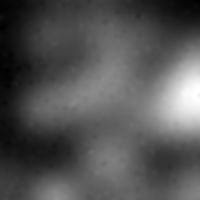

In [2]:
python3 txt2png.py grayscale.txt grayscale.png
display < grayscale.png

### パーシステント図の計算

パーシステント図の計算は以下のようにします。
とします。`grayscale.idiagram`というファイルが生成されます。
これがパーシステント図の情報を収めたファイルです。

In [3]:
python3 -m homcloud.pict.pixel_levelset_nd -m superlevel -T text2d -I -D grayscale.txt -o grayscale.idiagram

* `-m superlevel` はスーパーレベルフィルトレーションを使うことを意味します。`-m sublevel`とするとサブレベルフィルトレーションを代わりに使います。
* `-T text2d` で入力データがテキストデータの2次元画像であることを指定します。白黒の場合と同じで二次元画像(`picture2d`)やnumpyのnpyやnpz(`npy`)などのフォーマッ
トが指定できます。
* `-I -D` はHomCloudの便利機能を有効にするもので常に指定しておくと良いです
* `-o grayscale.idiagram` で出力ファイルを指定します。

### パーシステント図の可視化

次に計算結果の0次のパーシステント図、つまり連結成分、島構造、を可視化しましょう。
スーパーレベルを使っているので、値の高い部分、つまり白色のピークの構造などが捉えられます。

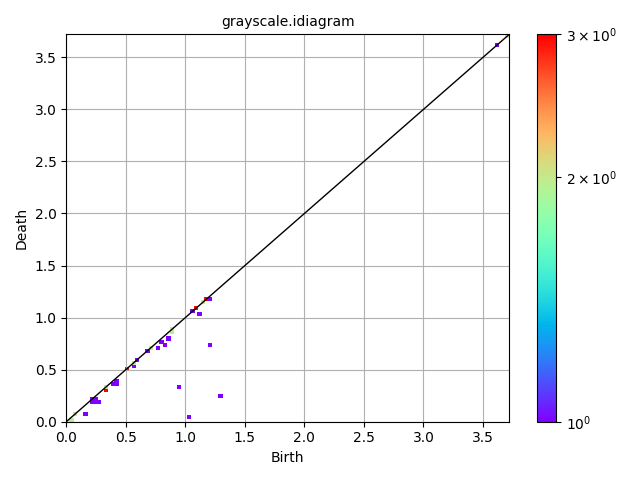

In [4]:
python3 -m homcloud.plot_PD -d 0 -l grayscale.idiagram -o grayscale-pd0.png
display < grayscale-pd0.png

ラムのグリッドが細かすぎてちょっとわかりにくいようです(デフォルトは
128x128です)。グリッドを荒くしましょう。

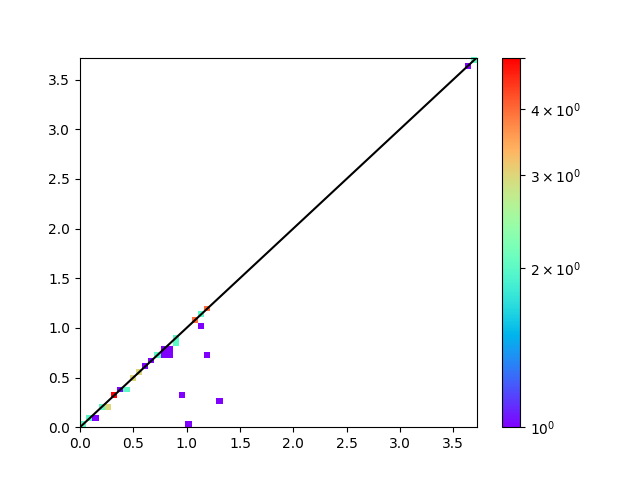

In [5]:
python3 -m homcloud.plot_diagram -d 0 -l -X 64 grayscale.idiagram -o grayscale-pd0.png
display < grayscale-pd0.png

この図ではbirth-death pairは図の右下のほうに来ています。
通常は birth < death なので左上のほうに現れるのですが、
スーパーレベルフィルトレーションを使うということは閾値を大きいほうから
小さいほうに下げていく過程での島の生成と消滅を見ているので
birth のほうが閾値では大きくなるのです。

練習問題: birth-death pairは`[0,1.5]x[0,1.5]`のあたりに多く分布しているようです。
このあたりを拡大して表示しましょう。

### テキストファイルへの出力

これはどの入力データでも同じです。

In [6]:
python3 -m homcloud.dump_diagram -d 0 -S no grayscale.idiagram -o grayscale-superlevel-0.txt

`grayscale-superlevel-0.txt`に保存されます。中身を表示しましょう。最初の10行だけ見てみます。

In [7]:
head grayscale-superlevel-0.txt

3.72049834765332 3.7197502020373268
3.7163519029875003 3.7158144776672444
3.621999565745782 3.613981730748671
1.2988804792640827 0.2385550375924738
1.2152244583757872 0.7406097154584625
1.2025095889411836 1.1715595335783242
1.176775669503608 1.1748963545484543
1.1764648900432442 1.1756972901408884
1.1756502408459244 1.1756031665923592
1.1607016486307964 1.1514168046689475


1列目がbirth time、2列目がdeath timeです。
このデータからも birth > death となっていることがわかります。

### 逆解析(birth pixel, death pixel)

対角線から離れた birth-death pairが重要な構造を表現しているわけなので、上で
見たパーシステント図から、death - birth < -0.3 となるような点の
由来を元データに戻って調べてみることにしましょう。下図の
丸を付けたものです。

逆解析の手法も基本的には白黒画像の場合と同じです。
HomCloudのbirth pixel、death pixel出力機能を使います。島(連結成分)が生まれた/死んだ
ときのピクセルの位置を出力します。
まずはテキストで出力します。

In [8]:
# tail で最後の10行だけ表示
python3 -m homcloud.diagram_to_text -d 0 -S yes grayscale.idiagram | tail

0.29015713214249433 0.19807269461663676 (196,99) (194,102)
0.24130412048086794 0.20828389784958326 (141,142) (137,142)
0.23668959357335026 0.1999475786311744 (40,89) (38,92)
0.2292401082938145 0.21786746491230968 (193,145) (195,144)
0.2119250926210861 0.1991735264823841 (192,91) (192,88)
0.15068773846844208 0.06964889356075547 (48,147) (48,143)
0.0662724214357912 0.06472001807625402 (192,153) (193,153)
0.061794951766380085 0.06084786868872256 (197,160) (196,160)
0.03864398773199453 -0.0 (25,81) (24,81)
0.030625010394502262 0.02347062232155903 (167,141) (167,140)


1列目がbirth time、2列目death time、3列目がbirth pixel、4列目がdeath pixelです。
0次のパーシステントホモロジーの場合、birth pixelがその島のピーク位置になるので
重要です。つまり3列目ですね。これを可視化してみましょう。
このピクセルを入力画像の上に表示してみます。

In [9]:
python3 -m homcloud.view_index_pict -d 0 -f "lifetime < -0.3" -B --no-label \
    grayscale.png grayscale.idiagram -o grayscale-birthpixels.png
display < grayscale-birthpixels.png

オプションの意味等は二値画像の場合と同じです。ちょっと注意しておくと、ここでベースの画像
(`grayscale.png`)に最初に`txt2png.py`で作った画像を使っています。

この画像が`grayscale-birthpixels.png`に出力されます。
赤い丸がbirth pixelの位置です。

画像の特徴的な白のピーク位置が捉えられています。では一番のピークの
位置はどうなっているのでしょう？実はこれはdeath timeが-∞となるものと対応しています。
そしてdeath timeが-∞のものに関してはbirth/death pixelが出力されていないので
こうなっています。


### 高度な逆解析

二値画像の場合には`pict.tree`モジュールを使って高度な解析を行いました。グレイスケール画像の場合でも同様の解析を
行ってみましょう。

In [10]:
python3 -m homcloud.pict.tree -m superlevel -T text2d grayscale.txt -o grayscale.p2mt

`-m` オプションや `-T` オプションの意味はこのグレイスケール画像のチュートリアルの最初に説明した
`pict.pixel_levelset_nd` と同じです。

`pict.show_volume_2d` で可視化します。

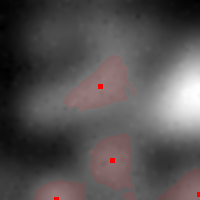

In [11]:
python3 -m homcloud.pict.show_volume_2d -d 0 -f "lifetime < -0.3" -B --volume --alpha 0.1 -S 5\
    grayscale.png grayscale.p2mt -o grayscale-pd0-volume.png 
display < grayscale-pd0-volume.png

赤い四角形が birth-pixel でその周辺の薄い赤い領域がその birth-death pair に対応する領域です。
このプログラムの引数は以下の通りです。

* `-d 0` 0次のPDのbirth-death pairを調べることを指定
* `-f "lifetime < -0.3"` lifetime (death - birth) が -0.3 より小さい birth-daeth pairに
  対応する領域だけ表示することを指定します。
* `-B` birth pixelを表示することを意味します。これを指定しないと赤い点が表示されません。
* `--volume` 領域を表示することを意味します。
* `--alpha 0.1` 領域を描画するときの色の濃さを指定します。0から1の範囲で指定し、小さくなるほど
  色が薄くなります(0で完全に透明になる)
* `-S 5` でbirth pixelの表示の大きさを指定します。5だと5x5になります。
* `grayscale.png grayscale.p2mt -o grayscale-pd0-volume.png` で画像ファイル名、`pict.tree`で生成した解析結果のファイル名、そして出力ファイル名を指定します。

以上でこのチュートリアルは終わりです。